Install libraries

In [3]:
!pip install numpy
!pip install matplotlib
!pip install gymnasium

Import Libs

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym

In [6]:
env = gym.make('MountainCar-v0')

In [7]:

def QLearning(env, learning, discount, epsilon, min_eps, episodes):
    print(env.observation_space)
    print(env.observation_space.high)
    print(env.observation_space.low)
    print(env.observation_space.high - env.observation_space.low)

    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low)*np.array([10, 100])
    print(num_states)
    num_states = np.round(num_states, 0).astype(int) + 1
    print(num_states)
    print(env.action_space.n)

    # Initialize Q table
    Q = np.random.uniform(low = -1, high = 1,
                          size = (num_states[0], num_states[1], env.action_space.n))
    print(Q)
    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []

    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes

    # Run Q learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = env.reset()

        # Discretize state
        state_adj = (state[0] - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)

        while done != True:
            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]])
            else:
                action = np.random.randint(0, env.action_space.n)

            # Get next state and reward
            new_state, reward, done, info, _ = env.step(action)

            # Discretize new_state
            new_state_adj = (new_state - env.observation_space.low)*np.array([10, 100])
            new_state_adj = np.round(new_state_adj, 0).astype(int)

            #Allow for terminal states
            if done and new_state[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward

            # Adjust Q value for current state
            else:
                delta = learning*(reward +
                                 discount*np.max(Q[new_state_adj[0],
                                                   new_state_adj[1]]) -
                                 Q[state_adj[0], state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta

            # Update variables
            tot_reward += reward
            state_adj = new_state_adj

        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction

        # Track rewards
        reward_list.append(tot_reward)

        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []

        if (i+1) % 100 == 0:
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))

    env.close()
    np.save('MountainCar-v0-q-learning', Q)


    return ave_reward_list


    print(env.observation_space)
    print(env.observation_space.high)
    print(env.observation_space.low)
    print(env.observation_space.high - env.observation_space.low)    
    print(num_states)
    print(num_states)
    print(env.action_space.n)    
    print(Q)

In [8]:
rewards = QLearning(env, 0.2, 0.9, 0.8, 0, 200)

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
[0.6  0.07]
[-1.2  -0.07]
[1.8000001 0.14     ]
[18.00000072 14.00000006]
[19 15]
3
[[[ 2.46654011e-01  8.77433042e-01 -4.81516627e-01]
  [-5.25892420e-01  7.36971482e-01 -4.69366098e-01]
  [-2.15045665e-01  6.22819180e-01 -1.15540032e-01]
  [-2.87525926e-01 -8.55808187e-01 -3.50611027e-01]
  [ 8.49978112e-01 -4.71812010e-01  9.10478435e-01]
  [-4.88006666e-01 -2.86217242e-01 -9.54380114e-01]
  [-6.40973088e-01 -4.99301746e-01 -9.41848120e-01]
  [-8.25134138e-01  7.47805793e-01  9.33248940e-03]
  [-2.33688866e-01 -2.05898694e-01 -2.07353511e-01]
  [-4.45387436e-01 -9.92084670e-01 -9.32885086e-01]
  [-7.42152892e-01 -1.51379432e-01 -1.52135608e-01]
  [ 7.40485952e-01 -5.80929226e-01  1.25818361e-01]
  [ 1.78964207e-01 -1.39960680e-01 -3.43827031e-01]
  [ 1.68774193e-02 -7.71587329e-01  9.74724345e-01]
  [-3.49907353e-02  8.55811904e-02  5.03527773e-01]]

 [[ 4.16476966e-01  1.15217763e-01  1.27521297e-01]
  [ 8.92433630e-01  2.60733752e-02 

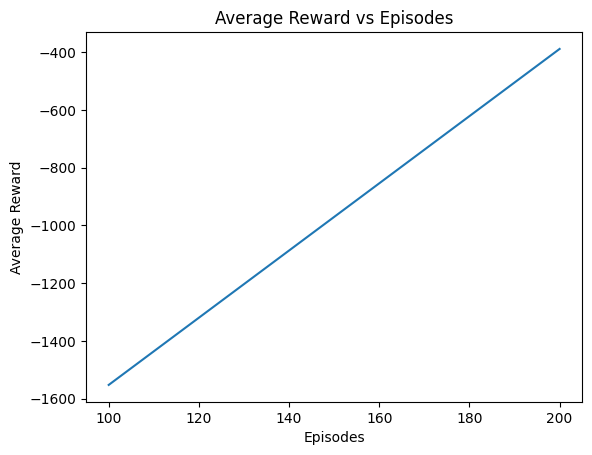

In [9]:
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.savefig('rewards.jpg')
plt.show()
plt.close()